# Задача 1
*** 
> Да се направи бифуркациски дијаграм за логистичкото пресликување. Тоа е зависност на видот на решение

\begin{equation}
f_r (x) = rx (1 - x)
\end{equation}


Идејата зад **Bifurcation Diagram** е да се види како понашањето на динамички системи се менува со менување на параметар како на пр $r$. Ни дава како глобален видик за различните видови на однесување на системот. Се прават примероци различни од функцијата за повеќе вредности на $r$ за да се види што всушност се случува од една вредност на друга. 


Овој график доаѓа како визуелизација на бројот на <u>конечни состојби</u> (final states) како параметарот расте на логистичката функција. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Logistic function implementation
def logistic_eq(r,x):
    return r*x*(1-x)

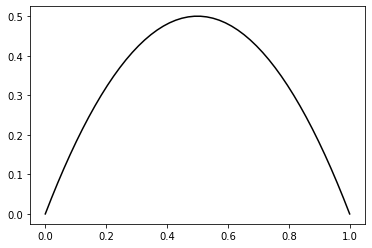

In [3]:
# Show the logistic function
x = np.linspace(0, 1)
plt.plot(x, logistic_eq(2, x), 'k')
plt.show()

# logistic_eq(4.0009, 0.75)

In [4]:
# Iterate the function for a given r
def logistic_equation_orbit(seed, r, n_iter, n_skip=0):
    print('Orbit for seed {0}, growth rate of {1}, plotting {2} iterations after skipping {3}'.format(seed, r, n_iter, n_skip))
    X_t=[]
    T=[]
    t=0
    x = seed;
    # Iterate the logistic equation, printing only if n_skip steps have been skipped
    for i in range(n_iter + n_skip):
        if i >= n_skip:
            X_t.append(x)
            T.append(t)
            t+=1
        x = logistic_eq(r,x);
    # Configure and decorate the plot
    plt.plot(T, X_t)
    plt.ylim(0, 1)
    plt.xlim(0, T[-1])
    plt.xlabel('Time t')
    plt.ylabel('X_t')
    plt.show()

Orbit for seed 0.1, growth rate of 3.05, plotting 100 iterations after skipping 0


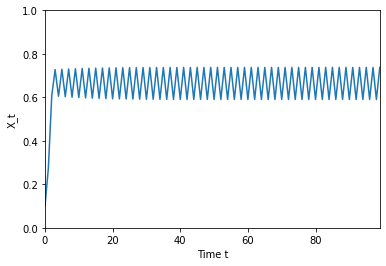

Orbit for seed 0.1, growth rate of 3.9, plotting 100 iterations after skipping 0


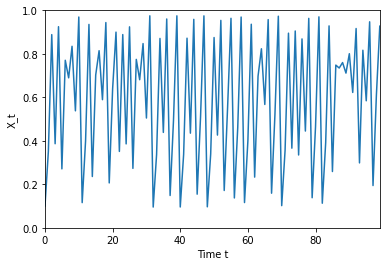

Orbit for seed 0.1, growth rate of 3.9, plotting 100 iterations after skipping 1000


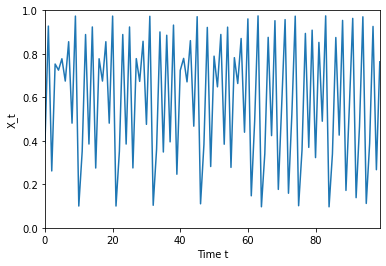

In [5]:
logistic_equation_orbit(0.1, 3.05, 100)
logistic_equation_orbit(0.1, 3.9, 100)
logistic_equation_orbit(0.1, 3.9, 100, 1000)

In [6]:
# Create the bifurcation diagram
def bifurcation_diagram(seed, n_skip, n_iter, step=0.0001, r_min=0):
    print("Starting with x0 seed {0}, skip plotting first {1} iterations, then plot next {2} iterations.".format(seed, n_skip, n_iter));
    # Array of r values, the x axis of the bifurcation plot
    R = []
    # Array of x_t values, the y axis of the bifurcation plot
    X = []
    
    # Create the r values to loop. For each r value we will plot n_iter points
    r_range = np.linspace(r_min, 4, int(1/step))

    for r in r_range:
        x = seed;
        # For each r, iterate the logistic function and collect datapoint if n_skip iterations have occurred
        for i in range(n_iter+n_skip+1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = logistic_eq(r,x);
    # Plot the data    
    plt.plot(R, X, ls='', marker=',')
    plt.ylim(0, 1)
    plt.xlim(r_min, 4)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()

Starting with x0 seed 0.2, skip plotting first 100 iterations, then plot next 5 iterations.


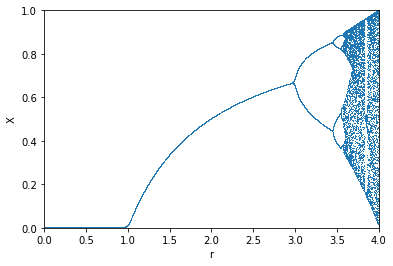

Starting with x0 seed 0.2, skip plotting first 100 iterations, then plot next 10 iterations.


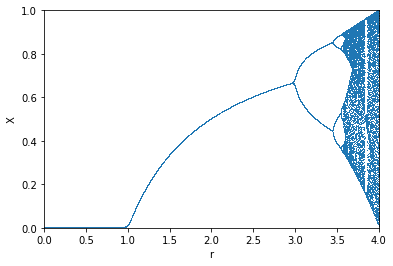

Starting with x0 seed 0.2, skip plotting first 100 iterations, then plot next 10 iterations.


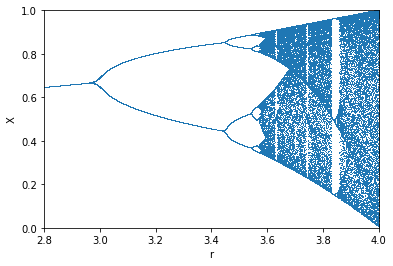

In [7]:
bifurcation_diagram(0.2, 100, 5)
bifurcation_diagram(0.2, 100, 10)
bifurcation_diagram(0.2, 100, 10, r_min=2.8)

Во $r=3$ системот има  ***Bifurcation***, т.е. нагла кавлитативна промена во однесувањето на системот како што параметар се зголемува непрекинато. Во 3 промената е тоа што периодот на конечните состојби преминува од atracttor со период 1 во atracttor со период 2. 